In [1]:
from src import *
import warnings
warnings.filterwarnings("ignore")

/Users/michaelc.c.h/opt/miniconda3/envs/brain2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def shift_series_nulldistribution(Y, othermoviesdf, emotion_df, smfactor=1):
    ret_nscore = np.zeros((len(select)))
    ret_score  = np.zeros((len(select)))

    z1 = zscore(Y)
    for jdx, emotion in enumerate(select):
        concat_other = np.array(othermoviesdf[othermoviesdf.item == emotion]['score'])
        emo_series   = np.array(emotion_df[emotion_df.item==emotion]['score'])
        smoothened   = overlap_add(emo_series, smfactor)
        z2           = zscore(smoothened[:z1.shape[0]])

        _, nscore, corr = moviemix_stat_test(z1, z2, concat_other)
        ret_nscore[jdx] = nscore
        ret_score[jdx]  = corr
    
    return ret_score, ret_nscore

## Table of Contents
- [Generating metric emotion correlation tables](#comparison)
- [Analysis of emo-metric-table](#weightings)

<a class="anchor" id="comparison"></a>
### Generating metric emotion correlation tables

In [3]:
networks = list(index2region.keys())

select   = ['Anger','Guilt','WarmHeartedness', \
             'Disgust','Happiness','Fear','Regard','Anxiety', \
             'Satisfaction','Pride','Surprise','Love','Sad']

In [4]:
movienames = [moviename.split('_')[0] for moviename in os.listdir('./resources/dynamic_grad/group_level414') 
              if '80' in moviename]

FileNotFoundError: [Errno 2] No such file or directory: './resources/dynamic_grad/group_level414'

In [5]:
# pairs = []
# for net in networks:
#     for net2 in networks:
#         if net == net2: continue
#         if ((net,net2) not in pairs) and ((net2,net) not in pairs):
#             pairs.append((net,net2))
                
# for moviename in tqdm(movienames):
#     if moviename == "Rest": continue
#     # 1. Loading Gradient
#     G_movie, varM = load('./resources/dynamic_grad/group_level414/{}_40_grad.pkl'.format(moviename))
    
#     # 2. Loading Matching Emotion Track
#     full_df  = pd.read_csv('./data/emotion_compileBIDS.csv')
#     emo_df   = full_df[full_df['filename']=='W_{}13.csv'.format(moviename)]
#     other_df = full_df[full_df['filename']!='W_{}13.csv'.format(moviename)]

#     # Grid for each network of correlation with emotions
#     grad_idx = 0
#     smfactor = 1
#     tolshift = 0

#     n = len(pairs)
#     m = len(select)

#     nb_metric = 3
#     scores    = np.zeros((nb_metric, n,m))
#     nscores   = np.zeros((nb_metric, n,m))

#     # METRIC 1
#     for idx, pair in enumerate(tqdm(pairs)):
#         p1,p2 = pair
#         y     = np.asarray([networks_distance(G_movie[t], G_movie[t], p1, p2) 
#                         for t in range(len(G_movie))])
#         z1    = zscore(y)
#         for jdx, emotion in enumerate(select):
#             concat_other = np.array(other_df[other_df.item == emotion]['score'])
#             emo_series   = np.array(emo_df[emo_df.item==emotion]['score'])
#             smoothened   = overlap_add(emo_series, smfactor)
#             z2 = zscore(smoothened[:z1.shape[0]])

#             _, nscore, corr     = moviemix_stat_test(z1, z2, concat_other)
#             nscores[0, idx,jdx] = nscore
#             scores[0, idx,jdx]  = corr

#     # METRIC 2
#     for idx, R in enumerate(tqdm(networks)):
#         y  = np.asarray([network_volume(G_movie[t], R) 
#                         for t in range(len(G_movie))])
#         z1 = zscore(y)

#         for jdx, emotion in enumerate(select):
#             concat_other = np.array(other_df[other_df.item == emotion]['score'])
#             emo_series   = np.array(emo_df[emo_df.item==emotion]['score'])
#             smoothened   = overlap_add(emo_series, smfactor)
#             z2 = zscore(smoothened[:z1.shape[0]])

#             _, nscore, corr     = moviemix_stat_test(z1, z2, concat_other)
#             nscores[1, idx,jdx] = nscore
#             scores[1, idx,jdx]  = corr

#     # METRIC 3
#     for idx, R in enumerate(tqdm(networks[:3])):
#         y  = varM[:,idx]
#         z1 = zscore(y)

#         for jdx, emotion in enumerate(select):
#             concat_other = np.array(other_df[other_df.item == emotion]['score'])
#             emo_series   = np.array(emo_df[emo_df.item==emotion]['score'])
#             smoothened   = overlap_add(emo_series, smfactor)
#             z2 = zscore(smoothened[:z1.shape[0]])

#             _, nscore, corr     = moviemix_stat_test(z1, z2, concat_other)
#             nscores[2, idx,jdx] = nscore
#             scores[2, idx,jdx]  = corr

#     save('./resources/emo_metric_table/{}_40_2.pkl'.format(moviename),(nscores,scores))

In [6]:
# # For each region generate correlation with emotions
# for moviename in tqdm(movienames[9:]):
#     if moviename == "Rest": continue
#     # 1. Loading Gradient
#     G_movie, varM = load('./resources/dynamic_grad/group_level414/{}_40_grad.pkl'.format(moviename))
    
#     # 2. Loading Matching Emotion Track
#     full_df  = pd.read_csv('./data/emotion_compileBIDS.csv')
#     emo_df   = full_df[full_df['filename']=='W_{}13.csv'.format(moviename)]
#     other_df = full_df[full_df['filename']!='W_{}13.csv'.format(moviename)]

#     n = G_movie.shape[1]
#     m = len(select)

#     scores2  = np.zeros((n,m))
#     nscores2 = np.zeros((n,m))

#     for idx in tqdm(range(n)):

#     #     y    = np.asarray([ np.sum([points_distance(G_movie[t,idx], G_movie[t,jdx],pmethod="L2")   
#     #                                 for jdx in range(len(G_movie[t,:])) ])
#     #             for t in range(len(G_movie))])
#         y    = np.asarray([ points_distance(G_movie[t,idx], G_movie[t,:].mean(axis=0),pmethod="L2")
#                 for t in range(len(G_movie))])

#         ret_score, ret_nscore = shift_series_nulldistribution(y, other_df, emo_df)
#         scores2[idx]  = ret_score
#         nscores2[idx] = ret_nscore
    
#     save('./resources/emo_metric_table/parcel{}_40_2.pkl'.format(moviename),(nscores,scores))

### Analysis of emo-metric-table

In [39]:
permovies   = {}
countmovies = {}
for file in os.listdir('./resources/emo_metric_table/network_40_2_metric/'):
    nscores, scores = load('./resources/emo_metric_table/network_40_2_metric/{}'.format(file))
    nscores = nscores[1][:len(networks)]
    # chop = (nscores < 0.05) * scores
    # permovies[file.split('.')[0]]   = chop
    # countmovies[file.split('.')[0]] = np.array(nscores < 0.01 * (np.abs(scores) > 0.5) , dtype=float)
    countmovies[file.split('.')[0]] = np.array(nscores < 0.05 , dtype=float)

<AxesSubplot:>

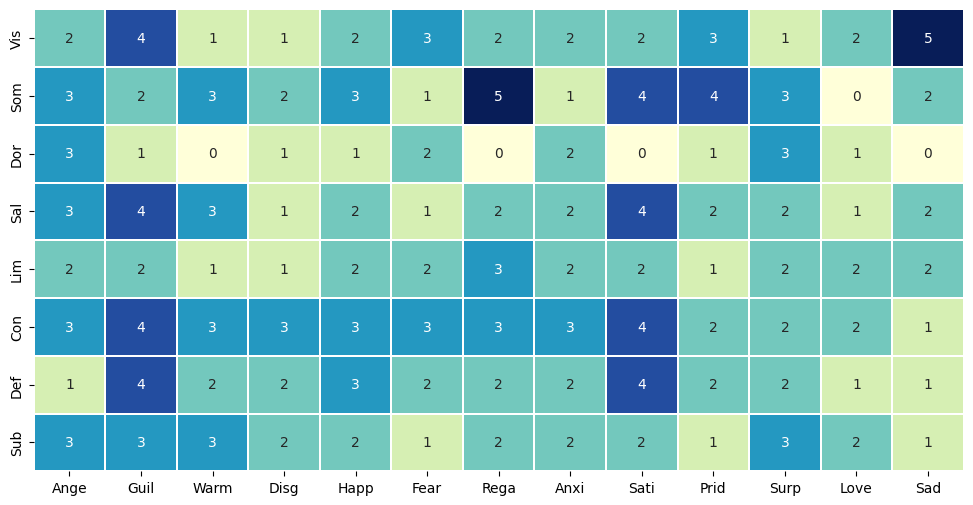

In [40]:
plt.figure(figsize=(12,6))
# plt.title("Number of significant correlations at 0.95")
x_axis_labels = [f[:4] for f in select] # labels for x-axis
y_axis_labels = [f[:3] for f in networks] # labels for x-axis
sns.heatmap(np.asarray(list(countmovies.values())).sum(axis=0), linewidth=0.1,  
            annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,  cbar=False, cmap='YlGnBu')

In [59]:
permovies   = {}
countmovies = {}
for file in os.listdir('./resources/emo_metric_table/parcel_40_2/'):
    nscores, scores = load('./resources/emo_metric_table/parcel_40_2/{}'.format(file))
    # chop = (nscores < 0.05) * scores
    # permovies[file.split('.')[0]]   = chop
    # countmovies[file.split('.')[0]] = np.array(nscores < 0.01 * (np.abs(scores) > 0.5) , dtype=float)
    countmovies[file.split('.')[0]] = np.array(nscores < 0.05 , dtype=float)

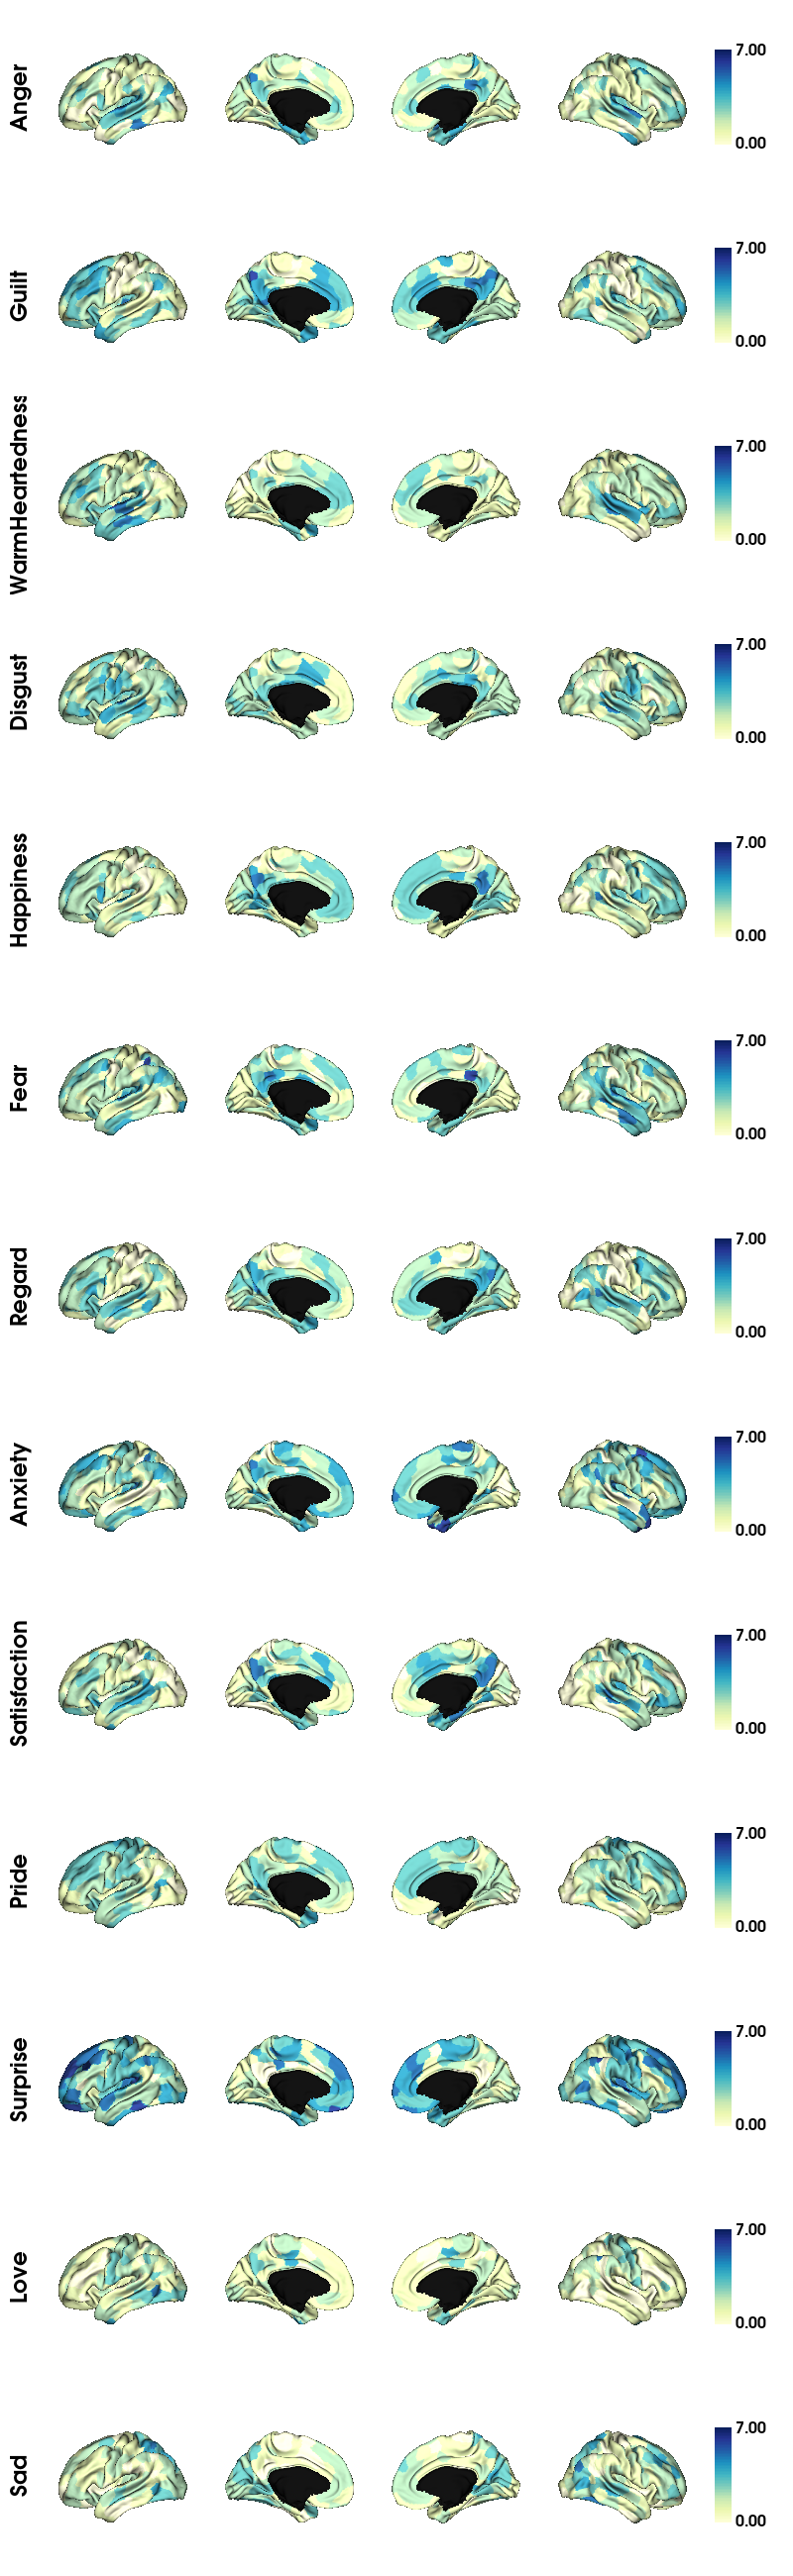

In [61]:
gs = np.asarray(list(countmovies.values())).sum(axis=0).T

# For a single movie: plots correlation of parcels versus emotions series
labeling         = load_parcellation('schaefer', scale=400, join=True)
surf_lh, surf_rh = load_conte69()
mask = labeling != 0

cranges = [(0,gs.max()) for i in range(len(select))]
gs      = gs[:,:400]

grad = [None] * len(select)
for k in range(gs.shape[0]):
    # map the gradient to the parcels
#     lb,rb   = gs.min(), gs.max()
#     , color_range=[(lb,rb),(lb,rb)]
    grad[k] = map_to_labels(gs[k], labeling, mask=mask, fill=np.nan)


plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(800, 2600), cmap='YlGnBu',
                 color_bar=True, label_text=select, zoom=1., embed_nb=True, interactive=False,
                 transparent_bg=False, color_range=cranges)

In [62]:
with open('./data/labels/TC_sub14_labels.csv') as f:
    text = f.readlines()
    text = [t.strip() for t in text]

order = "left-accumbens, left-amygdala, left-caudate, left-hippocampus, left-pallidum, left-putamen, left-thalamus, right-accumbens, right-amygdala, right-caudate, right-hippocampus, right-pallidum, right-putamen, right-thalamus".split(',')
order = [' '.join(o.split('-')).strip() for o in order]
dataorder = [t.lower() for t in text]

orderidx = [order.index(o) for o in dataorder]

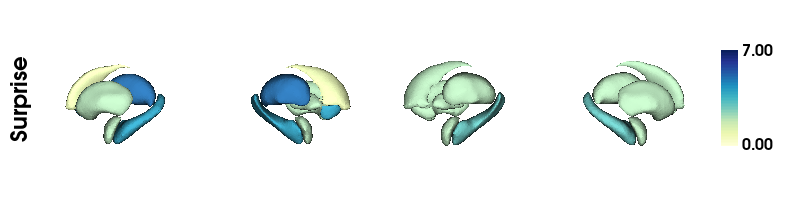

In [77]:
from enigmatoolbox.plotting import plot_subcortical
# Project the results on the surface brain
gs      = np.asarray(list(countmovies.values())).sum(axis=0).T
cranges = [(0, gs.max()) for i in range(len(select))]
gidx = 10

plot_subcortical(array_name=gs[gidx,400:][orderidx], ventricles=False, size=(800, 200),
                cmap='YlGnBu', color_bar=True,embed_nb=True, color_range=cranges[gidx]
                , label_text=['{}'.format(select[gidx])], interactive=False,transparent_bg=False, zoom=1.)

In [57]:
permovies   = {}
countmovies = {}
for file in os.listdir('./resources/emo_metric_table/parcel_40_2/'):
    nscores, scores = load('./resources/emo_metric_table/parcel_40_2/{}'.format(file))
    # chop = (nscores < 0.05) * scores
    # permovies[file.split('.')[0]]   = chop
    # countmovies[file.split('.')[0]] = np.array(nscores < 0.01 * (np.abs(scores) > 0.5) , dtype=float)
    countmovies[file.split('.')[0]] = np.array(nscores < 0.001 , dtype=float)

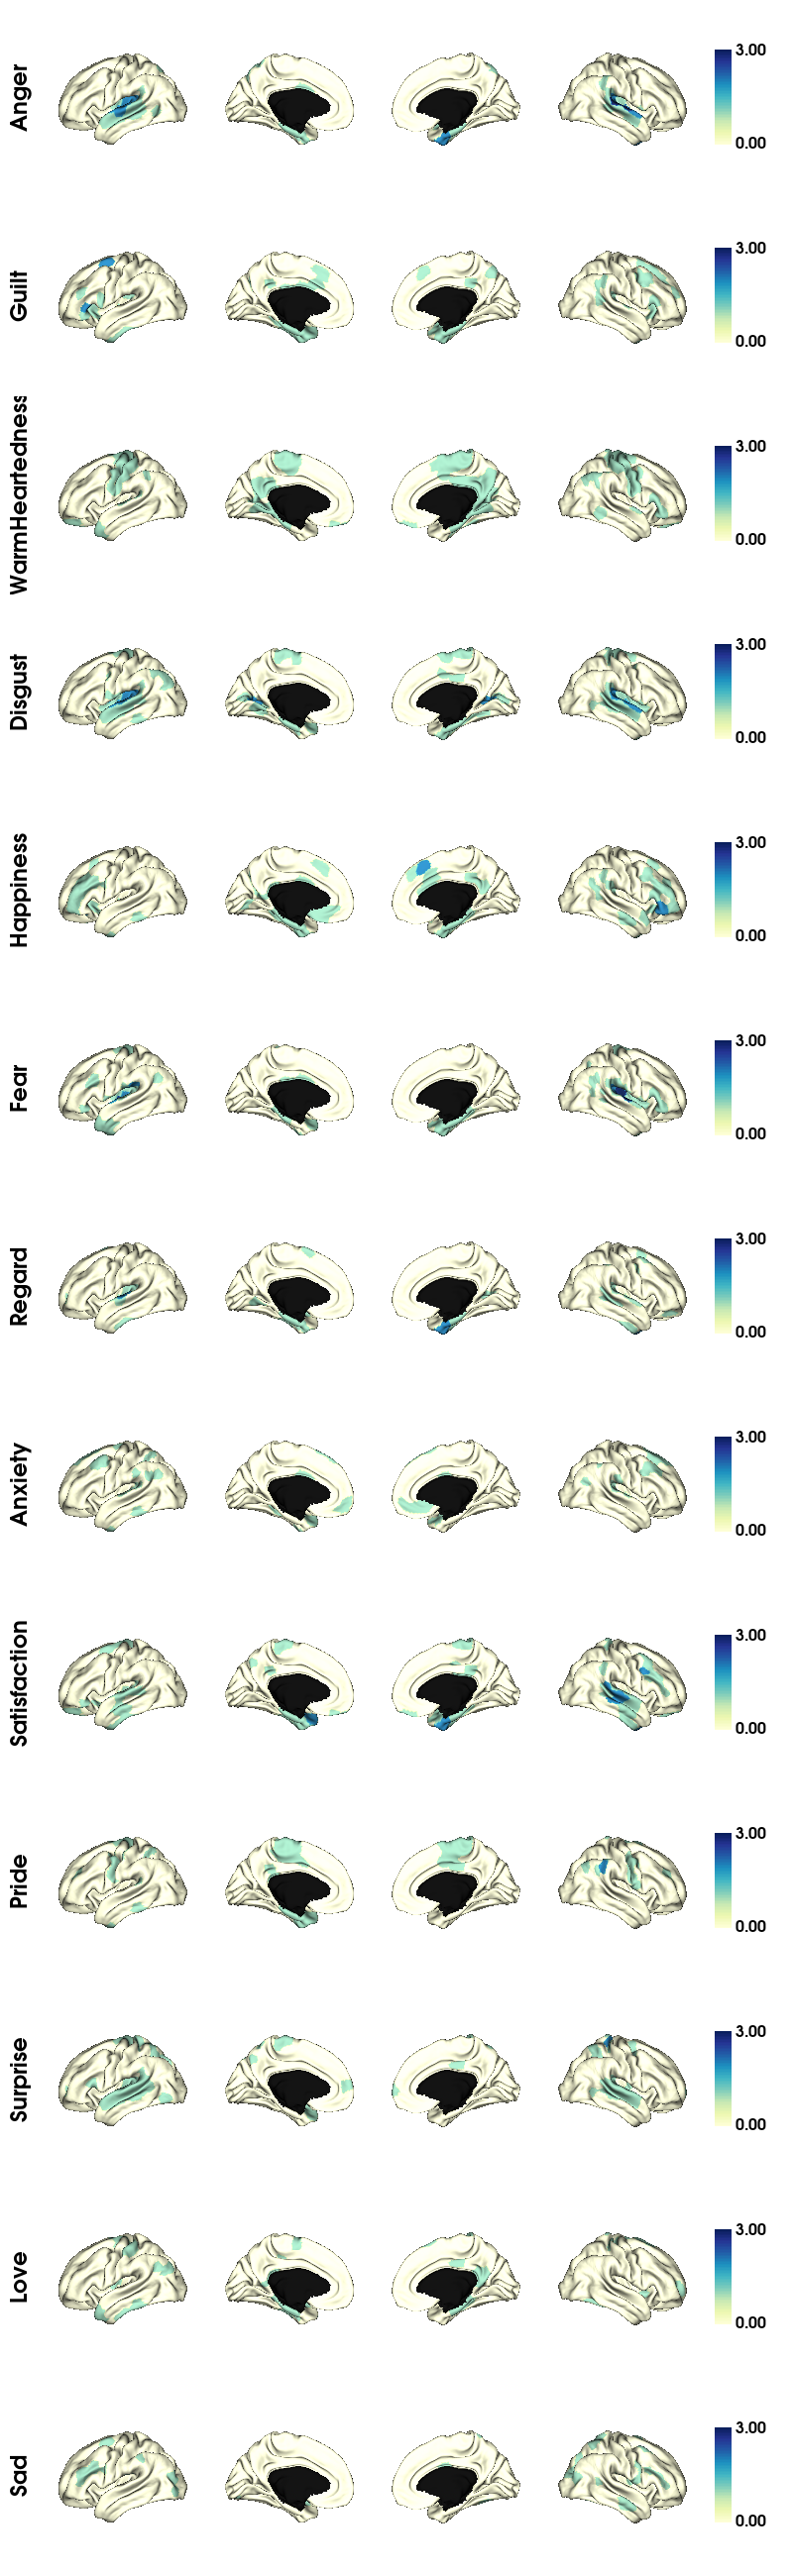

In [58]:
gs = np.asarray(list(countmovies.values())).sum(axis=0).T

# For a single movie: plots correlation of parcels versus emotions series
labeling         = load_parcellation('schaefer', scale=400, join=True)
surf_lh, surf_rh = load_conte69()
mask = labeling != 0

cranges = [(0,gs.max()) for i in range(len(select))]
for i in range(len(cranges)):
    if cranges[i] == (0,0):
        cranges[i] = (-1,1)
gs      = gs[:,:400]

grad = [None] * len(select)
for k in range(gs.shape[0]):
    # map the gradient to the parcels
#     lb,rb   = gs.min(), gs.max()
#     , color_range=[(lb,rb),(lb,rb)]
    grad[k] = map_to_labels(gs[k], labeling, mask=mask, fill=np.nan)


plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(800, 2600), cmap='YlGnBu',
                 color_bar=True, label_text=select, zoom=1., embed_nb=True, interactive=False,
                 transparent_bg=False, color_range=cranges)